In [1]:
import jax
import jax.numpy as jnp

import numpy as np
import matplotlib.pyplot as plt

import torch
#from torchvision import datasets, transforms

from torchvision.datasets import MNIST

device = torch.device("cpu")
dataset = MNIST(root='./data', download=True)
print(len(dataset))

60000


# Idea of PCA

## EX1: PCA from Statistical Point of View:
Assume we have a set of data $\{X^i\}_{i=1,2,...}$ in $\mathbb{R}^n$ of Gaussian distribution with 0 mean, how can we extract independent components from them?

(1): Assume that $X$ have vairance matrix $\Sigma$, write down the probability distribution. 

(2): How is $\Sigma$ like? Is it symmetric? Is it positive?

(3): Diagonalize $\Sigma$ with an orthogonal matrix $U$, write down the probabilioty distribution of $UX$. What happens to it now?

## Ex2: Geometric Point of view of PCA

Assume we have a set of data $\{X^i\}_{i=1,2,... N}$ in $\mathbb{R}^n$ with 0 mean. Do the following:

(1): Assume that we project $X^i$ s to a specific unit vector $\xi$, with what $\xi$ can we best approximate $X^i$ with its component along $\xi$?

(2): What if we project $X^i$ to a subspace of dimension $l<n$, what should be the subspace with which $X^i$ best approximate $X^i$?

(3): Write down the loss function. Which should be the average distance of %X^i$ to a certain subspace. 

# Coding

We implement PCA in 2 ways: 

(1) Direct extracting the eigenvectors of the greatest eigenvalue

(2) Through minimize its distance to undetermined subspace.

In [2]:
X = np.random.randn(100, 10)
A = X.T @ X
vecs = jnp.linalg.eigh(A)[1]
(A@vecs[:,0])/vecs[:,0]
jnp.linalg.eigh(A)[0]

Array([ 59.124405,  63.54812 ,  68.76867 ,  86.3773  ,  93.523674,
        98.06101 , 113.47344 , 129.4222  , 145.6174  , 157.32114 ],      dtype=float32)

In [3]:
# Implement PCA via directly taken the eigenvectors of largest eigenvalues
def direct_pca(X, n):
    # This function do PCA by directly diagonalize X^T X
    # Use jax to diagonalize X^T X and extract the eigenvectors
    
    return 0. #the output should be components, eigenvectors

Text(0.5, 1.0, 'After PCA')

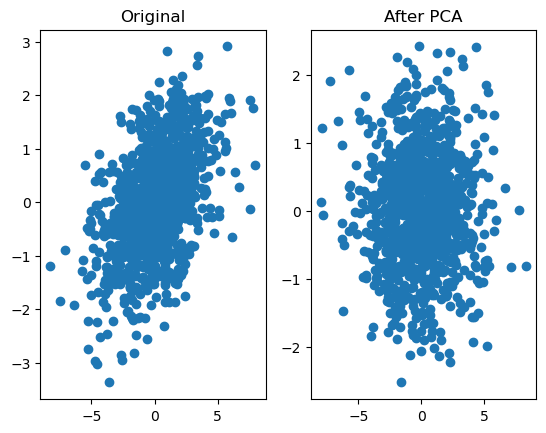

In [4]:
X = jnp.asarray(np.random.randn(1000, 2))
A = jnp.asarray(np.asarray([[1,1],[2,0]]))
X = X@A

features, Y = direct_pca(X,2)

fig, ax = plt.subplots(1,2)
ax[0].scatter(X[:,0], X[:,1])
ax[1].scatter(Y[:,0], Y[:,1])

ax[0].set_title("Original")
ax[1].set_title("After PCA")

Text(0.5, 1.0, 'After PCA')

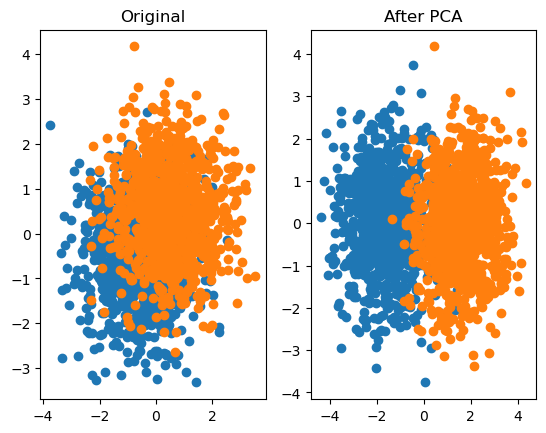

In [5]:
X1 = np.random.randn(1000,10)-0.5
X2 = np.random.randn(1000,10)+0.5
X = np.concatenate([X1, X2], axis=0)

features, Y = direct_pca(X,2)

fig, ax = plt.subplots(1,2)
ax[0].scatter(X1[:,0], X1[:,1])
ax[0].scatter(X2[:,0], X2[:,1])
ax[1].scatter(Y[0:1000,0], Y[0:1000,1])
ax[1].scatter(Y[1000:2000,0], Y[1000:2000,1])

ax[0].set_title("Original")
ax[1].set_title("After PCA")

# Check with Built Up package

One can do PCA directly with scikit-learn.

In the following we check our result by looking at 
$$
\cos\langle \xi, \xi_{sklearn} \rangle = \frac{\xi^T \xi_{sklearn}}{|\xi||\xi_{sklearn|}}
$$. 

If it approximates 1 or -1, we get the same eigenvalue.

Check the result with cos difference
[1.         0.99977076]


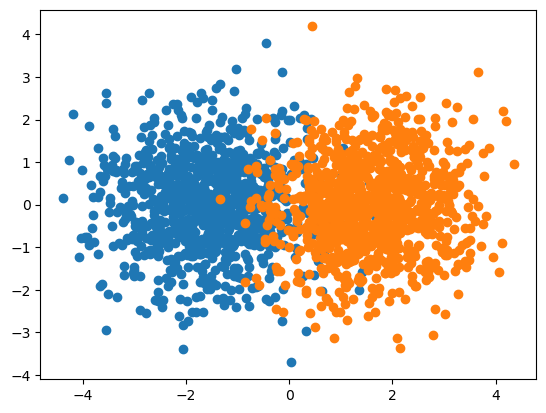

In [6]:
#Check the result with built packages
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

# 2. Fit PCA to the data
pca.fit(X)

# 3. Transform the data to principal components
X_pca = pca.transform(X)
eigvecs = pca.components_

plt.scatter(X_pca[0:1000, 0], X_pca[0:1000,1])
plt.scatter(X_pca[1000:2000, 0], X_pca[1000:2000,1])

print("Check the result with cos difference")
print(jnp.sum(eigvecs*features.T, axis=1)/jnp.linalg.norm(eigvecs, axis=1)/jnp.linalg.norm(features, axis=0))

Text(0.5, 1.0, 'After PCA')

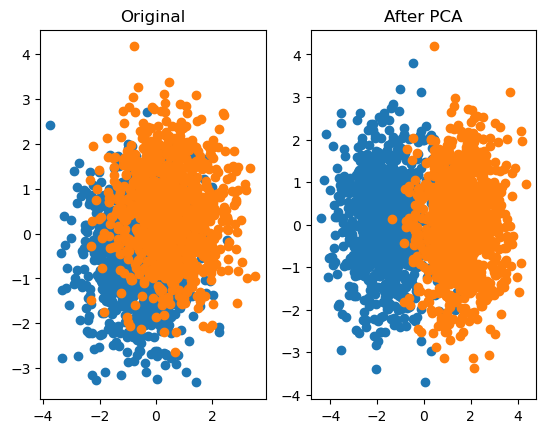

In [7]:
fig, ax = plt.subplots(1,2)
ax[0].scatter(X1[:,0], X1[:,1])
ax[0].scatter(X2[:,0], X2[:,1])
ax[1].scatter(X_pca[0:1000, 0], X_pca[0:1000,1])
ax[1].scatter(X_pca[1000:2000, 0], X_pca[1000:2000,1])

ax[0].set_title("Original")
ax[1].set_title("After PCA")

In [8]:
# Implement PCA with Autoencoder

def distance_func(X, D):
    # Calculate the distance between the input and its projection on subspace spanned by D
    return 0. 

def regularizer(lm, D):
    # Optional: introduce lagrangian multiplier to keep unitarity
    return 0. 

def loss_func(X, D, lm):
    return distance_func(X, D) + regularizer(lm, D)

In [9]:
X = np.random.randn(100, 10)
D = np.random.randn(10,3)/100
lm = jnp.ones([3,3])

[[-0.00935742 -0.00601994  0.00694556]
 [-0.00105614  0.01125789  0.00421279]
 [ 0.02810348  0.00545206  0.00496241]
 [ 0.00529592  0.00094398  0.01022611]
 [ 0.00503956 -0.01468375  0.00680014]
 [-0.00457731 -0.01954968  0.00407212]
 [ 0.00380455  0.0074778   0.00696218]
 [ 0.00379835 -0.00222206  0.00694982]
 [-0.01557024 -0.00698267 -0.00073947]
 [ 0.00464913  0.01054413 -0.01569505]]


In [10]:
lgD, lglm = 0, 0
for k in range(100):
    gD, glm = jax.grad(loss_func, argnums=(1,2))(X, D, lm)
    #print(glm)
    gD = gD + 0.9*lgD
    glm = glm + 0.9*lglm
    print(distance_func(X,D))
    D = D - 0.001*gD
    lm = lm - 0.001*glm
    lgD = gD
    lglm = glm

9.680713
9.680626
9.680455
9.680206
9.679879
9.679474
9.678986
9.678411
9.677743
9.676976
9.6761
9.675108
9.673986
9.672722
9.671302
9.669711
9.66793
9.6659355
9.663711
9.661228
9.65846
9.6553755
9.651943
9.648124
9.643877
9.639157
9.633913
9.628092
9.621632
9.614469
9.606525
9.597728
9.587986
9.577208
9.56529
9.552121
9.537581
9.521541
9.50386
9.484392
9.462977
9.439447
9.413625
9.385325
9.354357
9.320519
9.283612
9.243434
9.199779
9.152461
9.101288
9.0461
8.986747
8.923117
8.855129
8.782755
8.706013
8.624987
8.539831
8.450771
8.358119
8.262267
8.1636915
8.062945
7.960652
7.85749
7.7541795
7.651457
7.5500503
7.450656
7.3539133
7.2603784
7.1705065
7.0846405
7.0029993
6.9256883
6.8526993
6.7839317
6.7192125
6.6583104
6.6009655
6.5469036
6.495854
6.4475546
6.4017673
6.3582788
6.316898
6.277468
6.239858
6.203971
6.1697373
6.137124
6.106124
6.076759
6.049067
6.0231004
5.9989123
5.9765463
5.956027
5.9373565


# PCA on MNIST

In [39]:
# Normalize the data
def normalize_data(X):
    def single_func(X):
        return (X - X.mean())/jnp.sqrt(1e-10+jnp.var(X))
    return jnp.transpose(jax.vmap(single_func, (1))(X))

X = jnp.asarray(dataset.train_data)
X = jnp.reshape(X, (60000, 784))
X = normalize_data(X)

/opt/miniconda3/envs/jaxlab/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


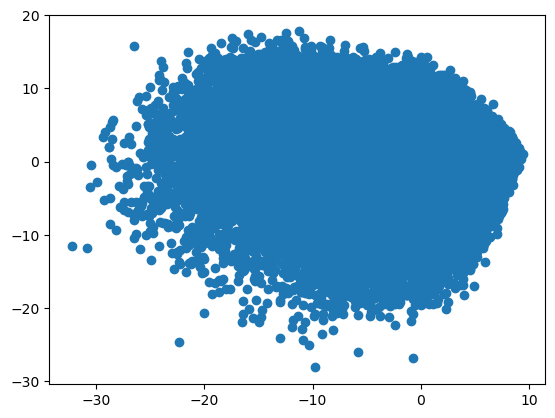

In [40]:
# Do PCA
n = 10
A = X.T@X
eigvals, eigvecs = jnp.linalg.eigh(A)
Y = jnp.dot(X, (jnp.flip(eigvecs, axis=1)[:,0:n]))
plt.scatter(Y[:,0], Y[:,1])

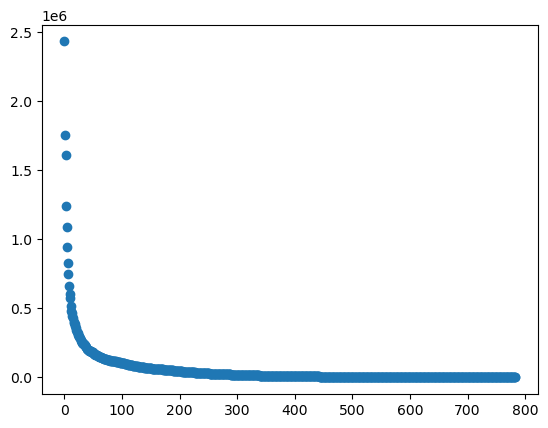

In [41]:
plt.scatter(jnp.arange(0,784), jnp.flip(eigvals))

# Use PCA to pre-process data

In [171]:
import flax.linen as nn
import optax
from flax.training import train_state
from functools import partial

class CNNDenseModel(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = nn.Conv(features=32, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2))
        x = nn.Conv(features=64, kernel_size=(3, 3))(x)
        x = nn.relu(x)
        x = nn.avg_pool(x, window_shape=(2, 2), strides=(2, 2))
        x = x.reshape((x.shape[0], -1))
        x = nn.Dense(features=128)(x)
        x = nn.relu(x)
        x = nn.Dense(features=10)(x)
        return nn.softmax(x)

In [178]:
@partial(jax.jit, static_argnames=['model'])
def loss_fn(X, Y, model:CNNDenseModel, params):
    tY = model.apply({'params': params}, X)
    loss = jnp.mean(jnp.square(tY-Y))
    return loss

In [181]:
def train_epoch(model, X, Y, batch_size, params_0, learning_rate=0.0001):
    N_data = X.shape[0]
    N_set = N_data//batch_size
    
    @jax.jit
    def update_func(x, g):
        return x - learning_rate*g
    
    params = params_0
    for k in range(0, N_set):
        ind1, ind2 = k*batch_size, (k+1)*batch_size
        loss, g_params = jax.value_and_grad(loss_fn, argnums=3)(X[ind1:ind2], Y[ind1:ind2], model, params)
        params = jax.tree_util.tree_map(update_func, params, g_params)
        #print(k, loss)
    
    return params

@partial(jax.jit, static_argnames=['model'])
def inference(model, X, Y, params):
    tY = model.apply({'params': params}, X)
    res = jnp.argmax(tY, axis=1)
    return jnp.mean(res==jnp.argmax(Y, axis=1))

In [182]:
# Train
labels = dataset.train_labels
X = jnp.asarray(dataset.train_data)
X = X.reshape(60000, 28,28,1)
Y = jax.nn.one_hot(jnp.asarray(labels), 10)

X = X[0:10000]
Y = Y[0:10000]

model = CNNDenseModel()
# number of data, data size, number of channel
dummy_input = jnp.ones([1, 28, 28, 1])
rng = jax.random.PRNGKey(100)
params_0 = model.init(rng, dummy_input)['params']

params = params_0
for k in range(0, 10):
    perm = jax.random.permutation(jax.random.PRNGKey(100*k), X.shape[0])
    X_per = X[perm]
    Y_per = Y[perm]
    params = train_epoch(model, X_per, Y_per, 100, params)
    print(k, inference(model, X, Y, params))

/opt/miniconda3/envs/jaxlab/lib/python3.11/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/opt/miniconda3/envs/jaxlab/lib/python3.11/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


0 0.1401
1 0.1647
2 0.17989999
3 0.1898
4 0.19919999
5 0.20789999
6 0.2146
7 0.2232
8 0.2329
9 

KeyboardInterrupt: 